In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import Settings0D
from PySDM_examples.deJong_Mackay_2022 import run_box_breakup, run_box_NObreakup
from atmos_cloud_sim_uj_utils import show_plot
import numpy as np
NUMBA_DISABLE_JIT = 1

from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc, Straub2010Ec
from PySDM.dynamics.collisions.breakup_fragmentations import Gaussian, ExponFrag, AlwaysN, Straub2010Nf
from PySDM.physics.constants import si
import PySDM.physics.constants as const
from PySDM.physics.trivia import Trivia

## Sensitivity to Ec (coalescence efficiency)

finished Ec=1.0
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [9.9904308e+05 0.0000000e+00 9.9904308e+05 0.0000000e+00]
 [9.4248000e+02 0.0000000e+00 9.4248000e+02 0.0000000e+00]]
finished Ec=0.95
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.17784577e+06 0.00000000e+00 1.11887931e+06 5.80397900e+04]
 [6.64827000e+03 0.00000000e+00 6.32485000e+03 2.95400000e+02]]
finished Ec=0.9
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.42055332e+06 0.00000000e+00 1.27830588e+06 1.39930150e+05]
 [7.90242323e+08 0.00000000e+00 6.92349452e+08 1.00665928e+07]]
finished Ec=0.8
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.24427654e+06 0.00000000e+00 1.80397368e+06 4.26243980e+05]
 [1.15295042e+11 0.00000000e+00 9.37629385e+10 8.72258453e+09]]


/Users/emilydejong/Documents/PySDM/PySDM/backends/impl_numba/storage.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.data[:] /= other.data[:]


finished Straub
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00696011e+06 0.00000000e+00 1.00425180e+06 2.60149000e+03]
 [4.25344000e+03 0.00000000e+00 3.51730000e+03 7.13840000e+02]]


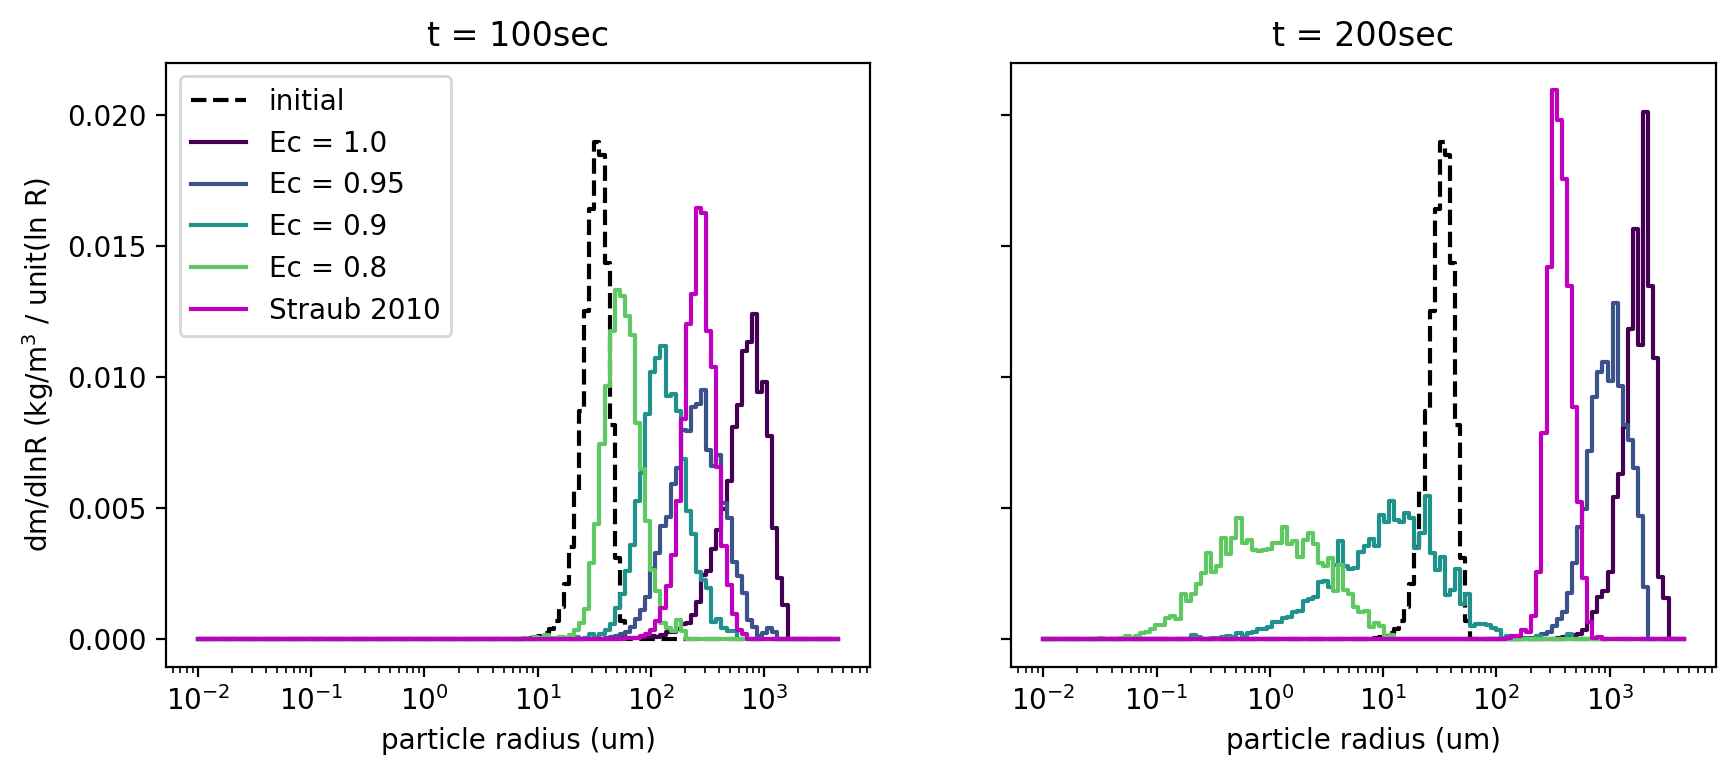

In [3]:
from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc
import numpy as np

settings = Settings0D()

rmin = 0.1 * si.um
vmin = 4/3 * np.pi * rmin**3
settings.fragmentation = AlwaysN(n=4, vmin=vmin)

settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )

settings.warn_overflows = False
t_steps = [0, 100, 200]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.95, 0.9, 0.8]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
ax[1].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
#ax[0].step(x[0],y[0,0]*settings.rho, color='k', label='100 sec')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        if Ec == 1.0:
            lbl = 'Ec = 1.0'
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Straub2010Ec()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Straub 2010'
    ax[j-1].step(x,y[j]*settings.rho, color='m', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Straub")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[0].legend()
ax[0].set_title("t = 100sec")
ax[1].set_title("t = 200sec")
pyplot.savefig('figures/Ec_sensitivity.pdf')

## Sensitivity to n_f

finished nf=2
[[     0.              0.              0.              0.        ]
 [924268.1             0.         832182.65833333  91764.40833333]]
finished nf=4
[[      0.               0.               0.               0.        ]
 [1232801.79166667       0.         1108505.04166667  119087.15      ]]
finished nf=5
[[       0.                0.                0.                0.        ]
 [17637834.55              0.         16140959.65         222241.21666667]]
finished nf=6
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.56095623e+10 0.00000000e+00 2.41698048e+10 2.85246579e+08]]


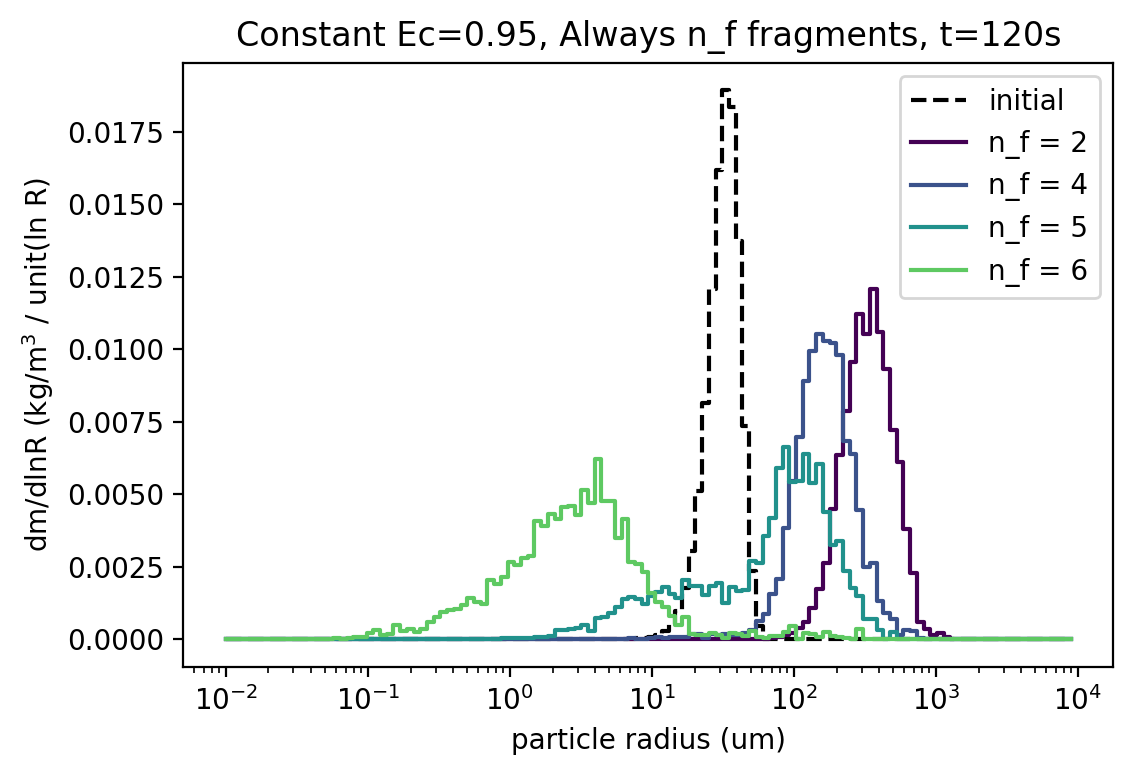

In [18]:
settings = Settings0D()

settings.coal_eff = ConstEc(Ec=0.90)
#settings.coal_eff = Berry1967()
settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(10000 * si.um), num=128, endpoint=True
        )

settings.warn_overflows = False
t_steps = [0, 120]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

nf_vals = [2, 4, 5, 6]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=1,sharey=True,figsize=(6,4),dpi=200)
ax.step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')

for (i, nf) in enumerate(nf_vals):
    settings.fragmentation = AlwaysN(n=nf)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished nf="+str(nf))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'n_f = ' + str(nf)
        if nf == 1:
            lbl += ' (coalescence)'
        ax.step(x,y[j]*settings.rho, color=cmap(i/len(nf_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)

ax.set_xscale("log")
ax.set_xlabel("particle radius (um)")
ax.set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax.legend()
ax.set_title("Constant Ec=0.95, Always n_f fragments, t=120s")
pyplot.savefig('figures/nf_sensitivity_constEc.pdf')

## Sensitivity to n_f distribution parameters

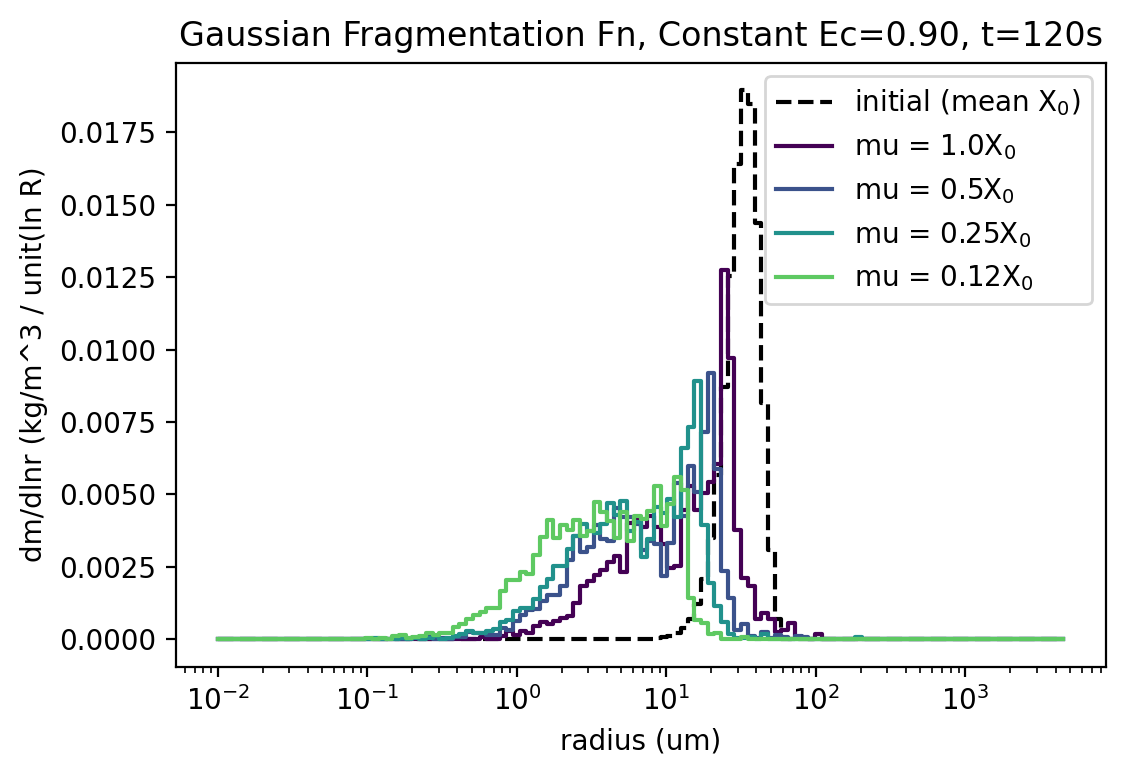

In [19]:
from PySDM.dynamics.collisions.breakup_fragmentations import ExponFrag, Gaussian
from PySDM.physics.constants import si

settings = Settings0D()
t_steps = [0, 120]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

settings.n_sd = 2**13
settings.warn_overflows = False
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )
X0 = settings.X0
mu_vals = [X0, X0/2, X0/4, X0/8]
sigma = X0 / 2.5
vmin = X0 * 1e-3
nfmax = 10
Ec = 0.90
settings.coal_eff=ConstEc(Ec=Ec)
#settings.coal_eff=Berry1967()
#settings.coal_eff=Straub2010Ec()

(x,y,rates) = run_box_breakup(settings, [0])
pyplot.figure(figsize=(6,4),dpi=200)
pyplot.step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial (mean X$_0$)')

for (i, mu) in enumerate(mu_vals):
    settings.fragmentation = Gaussian(mu=mu, sigma=mu/2.5, vmin=vmin, nfmax=nfmax)
    (x,y, rates) = run_box_breakup(settings, t_steps)
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'mu = ' + str(round(mu/X0,2)) + 'X$_0$'
        pyplot.step(x,y[j]*settings.rho, color=cmap(i/len(mu_vals)),linestyle='-',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
pyplot.title("Gaussian Fragmentation Fn, Constant Ec=0.90, t=120s")
pyplot.savefig('figures/gaussian_mu_sensitivity_constEc.pdf')
# pyplot.title("Gaussian Fragmentation Fn, Straub 2010 Ec")
# pyplot.savefig('figures/gaussian_mu_sensitivity_berry.png')


## Fully Stochastic: Straub 2010

/Users/emilydejong/Documents/PySDM/PySDM/backends/impl_numba/storage.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.data[:] /= other.data[:]


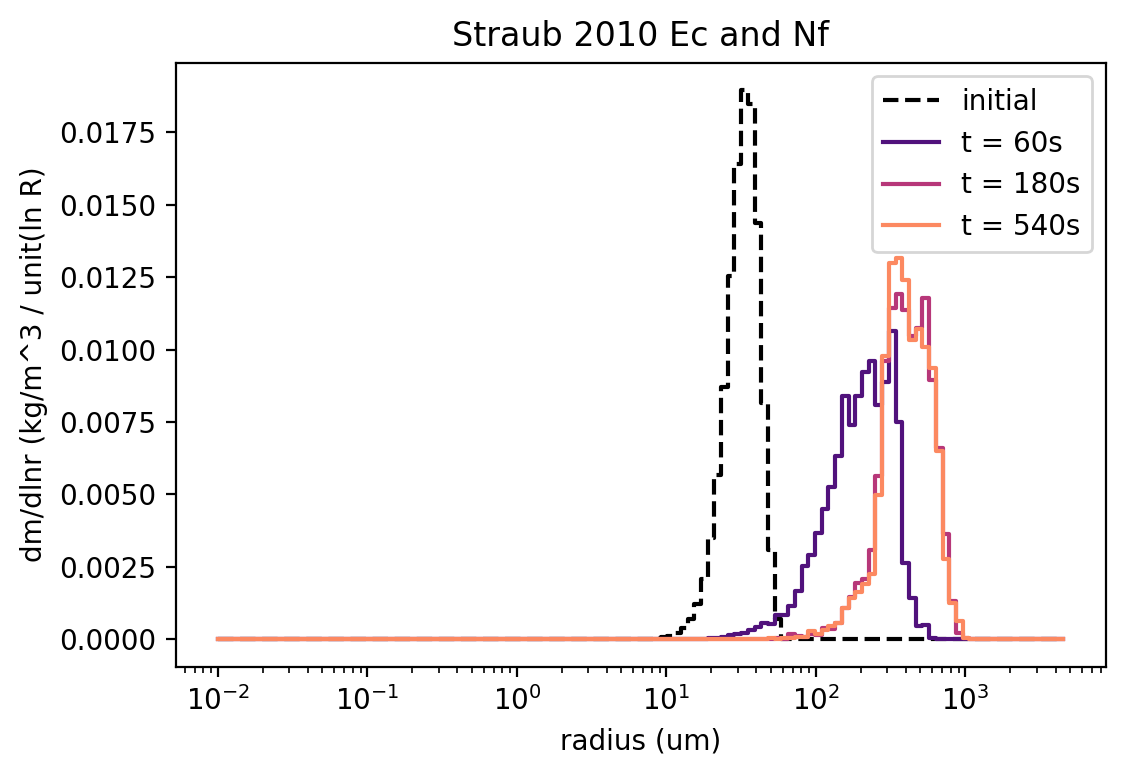

In [16]:
from PySDM.dynamics.collisions.breakup_fragmentations import ExponFrag, Gaussian
from PySDM.physics.constants import si

settings = Settings0D()
t_steps = [0, 60, 180, 540]
cmap = matplotlib.cm.get_cmap('magma')
legend_entries = []

settings.n_sd = 2**13
settings.warn_overflows = False
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )
vmin = X0 * 1e-3
nfmax = 10
settings.coal_eff=Straub2010Ec()
settings.fragmentation=Straub2010Nf(vmin=vmin, nfmax=nfmax)

(x,y,rates) = run_box_breakup(settings, [0])
pyplot.figure(figsize=(6,4),dpi=200)
pyplot.step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')

(x,y, rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    pyplot.step(x,y[j]*settings.rho, color=cmap(j/len(t_steps)),linestyle='-',
            label=f't = {step}s')

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
pyplot.title("Straub 2010 Ec and Nf")
pyplot.savefig('figures/straub_box.pdf')


## Sometimes_N Fragmentation

import numpy as np
from PySDM.dynamics.collisions.breakup_fragmentations import SometimesN

settings = Settings0D()

rmin = 0.1 * si.um
vmin = 4/3 * np.pi * rmin**3
settings.fragmentation = SometimesN(n=4, prob_n=0.3)

settings.n_sd = 2**13
settings.radius_bins_edges = np.logspace(
            np.log10(0.01 * si.um), np.log10(5000 * si.um), num=128, endpoint=True
        )

settings.warn_overflows = False
t_steps = [0, 100, 200]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [0.8]

(x,y,rates) = run_box_breakup(settings, [0])
fig, ax = pyplot.subplots(ncols=2,sharey=True,figsize=(10,4),dpi=200)
ax[0].step(x,y[0]*settings.rho, color='k', linestyle='--', label='initial')
#ax[0].step(x[0],y[0,0]*settings.rho, color='k', label='100 sec')

for (i, Ec) in enumerate(Ec_vals):
    settings.coal_eff = ConstEc(Ec=Ec)
    (x,y,rates) = run_box_breakup(settings, t_steps)
    print("finished Ec="+str(Ec))
    for (j, step) in enumerate(t_steps):
        if j == 0:
            continue
        lbl = 'Ec = ' + str(Ec)
        ax[j-1].step(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),#linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
    print(rates)


settings.coal_eff = Berry1967()
(x,y,rates) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    if j == 0:
        continue
    lbl = 'Berry 1967'
    ax[j-1].step(x,y[j]*settings.rho, color='m', label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')
print("finished Berry")
print(rates)

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[0].set_xlabel("particle radius (um)")
ax[1].set_xlabel("particle radius (um)")
ax[0].set_ylabel("dm/dlnR (kg/m$^3$ / unit(ln R)")
ax[0].legend()
ax[0].set_title("Geometric Kernel, n$_f$ = 4, t = 100sec")
ax[1].set_title("Geometric Kernel, n$_f$ = 4, t = 200sec")
#pyplot.savefig('figures/geometric_Ec_sensitivity.png')